In [1]:
###basicas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### datos y modelos sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

####### redes neuronales

import tensorflow as tf
from tensorflow import keras
!pip install keras_tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.6 MB/s eta 0:00:00


In [2]:
#cargar base de datos
url="https://raw.githubusercontent.com/juancamiloespana/LEA2/master/_data/credit_card_clients.csv"

credit_card=pd.read_csv(url)

In [20]:
#analizar base de datos
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [4]:
# Identificar nulos
credit_card.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

se identificaron 313 valores nulos en la variable MINIMUM_PAYMENTS y 1 nulo en la variable CREDIT_LIMIT

In [5]:
# tratamiento de nulos
credit_card= credit_card.dropna()

Se decide eliminar los nulos dado que representan solo el 4% de los datos y es necesario hacer este tratamiento para ejecutar la red neuronal

In [6]:
# verificar nuevamente los nulos
credit_card.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Se vuelven a revisar los nulos para comprobar que el tratamiento funcionó correctamente

In [7]:
# eliminar la variable CUST_ID
credit_card2 = credit_card.drop('CUST_ID', axis=1)
credit_card2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CREDIT

Se decide eliminar la variable 'CUST_ID' dado que es un identificador de los usuarios, por lo que pueden afectar el modelo más adelante.

In [9]:
###separar variable respuesta y variables explicativas

y_credit_card =credit_card2['PURCHASES']
X_credit_card =credit_card2[credit_card2.columns.difference(['PURCHASES'])]

In [10]:
# valor minimo de la variable respuesta
y_credit_card.min()

0.0

Se identifica que la variable respuesta no toma valores negativos, esto será importante tenerlo en cuenta para definir la función de activación

In [11]:
# escalar los datos
sc=StandardScaler().fit(X_credit_card)

#### exportar el escalador

import joblib

joblib.dump(sc, "/content/drive/MyDrive/Colab Notebooks/sc.joblib") ### exporta objeto

X_sc=sc.transform(X_credit_card)  ## escalado cob base en variales escladas

## separar entrenamiento evaluación

X_tr, X_te, y_tr, y_te= train_test_split(X_sc, y_credit_card, test_size=0.2)

#analizar las dimensiones
X_tr.shape

(6908, 16)

In [12]:
##### definir arquitectura de la red neuronal

ann1= keras.models.Sequential([

    keras.layers.Dense(64, input_shape=(16,),activation='relu'),

    keras.layers.Dense(32, activation='tanh'),

    keras.layers.Dense(1, activation='relu')

])

Se decide utilizar la funcion de activacion "relu" porque es un problema de regresión y la variable respuesta no toma valores negativos.

Se comienza con una red neuronal sencilla

In [13]:
# hiperparámetros de optimización
# definir funcion de perdida y metrica de desempeño
loss= keras.losses.MeanSquaredError()
opt= keras.optimizers.Adam(learning_rate=0.01)

# y la métrica

m= keras.metrics.RootMeanSquaredError(name = "RMSE")

Se define el MSE como función de pérdida ya que es una elección común para problemas de regresión y penaliza más fuertemente las diferencias más grandes.

Se define la métrica RMSE dado que es un ejercicio de regresión y consideramos que es una métrica que permite dar una fácil interpretación del desempeño del modelo y no sucede el problema que ocurría con el MAPE por los valores iguales a cero.


In [14]:
y_credit_card.mean()

1025.4338744789254

Se realiza el promedio de la variable respuesta para verificar que tan bueno es el desempeño del modelo aplicado.

In [15]:
# definir optimización y ajuste (entrenamiento)

ann1.compile(optimizer=opt, loss=loss, metrics=m)
ann1.fit(X_tr, y_tr, epochs=10, validation_data=(X_te, y_te))

Epoch 1/10
216/216 [==============================] - 2s 5ms/step - loss: 5773441.5000 - RMSE: 2402.7986 - val_loss: 5176004.5000 - val_RMSE: 2275.0835
Epoch 2/10
216/216 [==============================] - 1s 4ms/step - loss: 5648131.5000 - RMSE: 2376.5798 - val_loss: 5062505.0000 - val_RMSE: 2250.0012
Epoch 3/10
216/216 [==============================] - 1s 4ms/step - loss: 5537440.5000 - RMSE: 2353.1768 - val_loss: 4961399.0000 - val_RMSE: 2227.4199
Epoch 4/10
216/216 [==============================] - 1s 4ms/step - loss: 5431811.5000 - RMSE: 2330.6248 - val_loss: 4852821.5000 - val_RMSE: 2202.9121
Epoch 5/10
216/216 [==============================] - 1s 3ms/step - loss: 5322137.5000 - RMSE: 2306.9758 - val_loss: 4752870.0000 - val_RMSE: 2180.1079
Epoch 6/10
216/216 [==============================] - 1s 3ms/step - loss: 5221953.5000 - RMSE: 2285.1594 - val_loss: 4660901.5000 - val_RMSE: 2158.9121
Epoch 7/10
216/216 [==============================] - 1s 4ms/step - loss: 5128164.0000 -

Diagnostico : UNDERFITTING ya que el RMSE tiene un valor demasiado alto, dado que el promedio de la variable respuesta da 1025.43 y el RMSE divido este valor da como resultado 2,15 es decir más del 200% de error.

In [16]:
##### definir la nueva arquitectura de la red neuronal para complejizar el modelo
loss= keras.losses.MeanSquaredError()
opt= keras.optimizers.Adam(learning_rate=0.01)

# y la métrica
m= keras.metrics.RootMeanSquaredError(name = "RMSE")


ann2= keras.models.Sequential([

    keras.layers.Dense(256, input_shape=(16,),activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='tanh'),
    keras.layers.Dense(32, activation='tanh'),

    keras.layers.Dense(1, activation='relu')

])

# definir optimización y ajuste (entrenamiento)


ann2.compile(optimizer=opt, loss=loss, metrics=m)
ann2.fit(X_tr, y_tr, epochs=25, validation_data=(X_te, y_te))

Epoch 1/25
216/216 [==============================] - 2s 4ms/step - loss: 5777829.5000 - RMSE: 2403.7117 - val_loss: 5181025.0000 - val_RMSE: 2276.1865
Epoch 2/25
216/216 [==============================] - 1s 4ms/step - loss: 5652967.0000 - RMSE: 2377.5969 - val_loss: 5066553.0000 - val_RMSE: 2250.9004
Epoch 3/25
216/216 [==============================] - 1s 5ms/step - loss: 5540295.0000 - RMSE: 2353.7832 - val_loss: 4963416.0000 - val_RMSE: 2227.8726
Epoch 4/25
216/216 [==============================] - 1s 4ms/step - loss: 5439865.5000 - RMSE: 2332.3518 - val_loss: 4871055.0000 - val_RMSE: 2207.0466
Epoch 5/25
216/216 [==============================] - 1s 6ms/step - loss: 5349952.5000 - RMSE: 2312.9963 - val_loss: 4789658.0000 - val_RMSE: 2188.5288
Epoch 6/25
216/216 [==============================] - 3s 12ms/step - loss: 5269948.0000 - RMSE: 2295.6367 - val_loss: 4718099.0000 - val_RMSE: 2172.1187
Epoch 7/25
216/216 [==============================] - 2s 11ms/step - loss: 5199312.5000

Se decide aumentar el numero de epochs y el numero de capas para complejizar el modelo y tratar el problema de underfitting

In [17]:
### Afinamiento de grilla

hp=kt.HyperParameters()

def model_tuning(hp):

    dr= hp.Float("DR", min_value=0.05, max_value= 0.2, step=0.05)
    opti=hp.Choice("OPTI", ['adam', 'sgd' ])
    fa=hp.Choice("FA", ["tanh", "relu"])

    ann3= keras.models.Sequential([

      keras.layers.Dense(256, input_shape=(16,),activation=fa),
      keras.layers.Dense(128, activation= fa),
      keras.layers.Dense(64, activation= fa),
      keras.layers.Dense(32, activation= fa),

      keras.layers.Dense(1, activation='relu')

])

    if opti=="adam":
        opti2=keras.optimizers.Adam(learning_rate=0.001)
    else:
        opti2=keras.optimizers.SGD(learning_rate=0.001)

    ann3.compile(optimizer=opti2, loss=loss, metrics=m)

    return ann3

In [18]:
#### hyper parametros de grilla
search_model=kt.RandomSearch(
    hypermodel = model_tuning, ## nombre de funcion de construccion modelo
    hyperparameters = hp,
    objective = kt.Objective('val_RMSE', direction="min"),
    max_trials = 10,
    overwrite = True,
    project_name = "res_afin"
)

In [19]:
### este es como el fit pero con afinamiento
search_model.search(X_tr, y_tr, epochs=25, validation_data=(X_te, y_te))
search_model.results_summary()

win_model=search_model.get_best_models(1)[0] ### me muestra 1 modelo y escoge posicion 0

win_model.build()
win_model.summary()

Trial 10 Complete [00h 00m 43s]
val_RMSE: 2235.6337890625

Best val_RMSE So Far: 626.056884765625
Total elapsed time: 00h 05m 02s
Results summary
Results in ./res_afin
Showing 10 best trials
Objective(name="val_RMSE", direction="min")

Trial 05 summary
Hyperparameters:
DR: 0.2
OPTI: adam
FA: relu
Score: 626.056884765625

Trial 01 summary
Hyperparameters:
DR: 0.05
OPTI: sgd
FA: tanh
Score: 1701.6842041015625

Trial 02 summary
Hyperparameters:
DR: 0.2
OPTI: sgd
FA: tanh
Score: 1764.90625

Trial 03 summary
Hyperparameters:
DR: 0.1
OPTI: sgd
FA: tanh
Score: 1811.0045166015625

Trial 00 summary
Hyperparameters:
DR: 0.05
OPTI: adam
FA: tanh
Score: 2235.31640625

Trial 09 summary
Hyperparameters:
DR: 0.15000000000000002
OPTI: adam
FA: tanh
Score: 2235.6337890625

Trial 06 summary
Hyperparameters:
DR: 0.1
OPTI: adam
FA: tanh
Score: 2236.06982421875

Trial 07 summary
Hyperparameters:
DR: 0.2
OPTI: adam
FA: tanh
Score: 2237.7373046875

Trial 04 summary
Hyperparameters:
DR: 0.05
OPTI: sgd
FA: rel

In [65]:
######## analizar modelo  ganador

y_pred= np.argmax(win_model.predict(X_te),axis=1)

54/54 [==============================] - 1s 7ms/step


Best val_RMSE So Far: 626.056884765625

Como resultado el mejor modelo dio un RMSE de 626.05, que reduce el porcentaje de desviación del error al 61 %

In [31]:
from sklearn import metrics
win_model.build()

win_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 47617 (186.00 KB)
Trainable params: 47617 (186.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


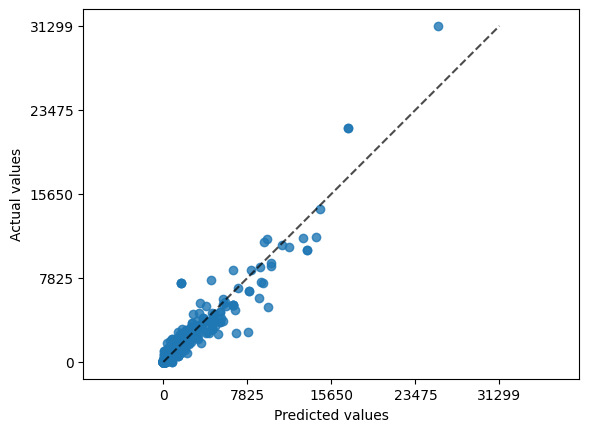

In [33]:
metrics.PredictionErrorDisplay.from_predictions(y_te,y_pred,kind= 'actual_vs_predicted')

La línea indica los valores reales y los puntos muestran qué tan lejos se encuentran del valor real, se observa que no hay mucha variación respecto al valor real.

In [34]:
#### exportar modelo ganador

joblib.dump(win_model, '/content/drive/MyDrive/Colab Notebooks/win_model.joblib') ### exportar modelo ganador

['/content/drive/MyDrive/Colab Notebooks/win_model.joblib']